# Python for Finance Tutorial For Beginners

*This notebook was made in preparation for the DataCamp tutorial "Python for Finance Tutorial for Beginners"; If you want more explanations on the code or on using Python for Finance, go to the full tutorial [here](https://www.datacamp.com/community/tutorials/finance-python-trading).*

The full tutorial covers the following topics:

* Getting Started With Python For Finance
    - Stocks & Trading
    - Time Series Data
    - Setting Up The Workspace
    - [Python Basics For Finance: Pandas](#basics)
        - Importing Financial Data Into Python
        - Working With Time Series Data 
        - Visualizing Time Series Data
* [Common Financial Analyses](#commonanalyses)
    - Returns
    - Moving Windows
    - Volatility Calculation
    - Ordinary Least-Squares Regression (OLS)
* [Building A Trading Strategy With Python](#tradingstrategy)
* [Backtesting A Strategy](#backtesting)
    - Implementation Of A Simple Backtester
    - Backtesting With Zipline And Quantopian
* Improving A Trading Strategy
* [Evaluating The Trading Strategy](#evaluating)
    - Sharpe Ratio
    - Maximum Drawdown
    - Compound Annual Growth Rate
* What now?

In [25]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

<a id='basics'></a>
## Python Basics For Finance: Pandas

### Importing Data
`yfinance` is a Python package that provides financial data, from stock prices to a company financial statments:

In [27]:
%pip install yfinance

In [28]:
import yfinance as yf

aapl=yf.download('AAPL',start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,2.682143,2.709643,2.653571,2.673571,2.275525,712639200
2006-10-03,2.658929,2.676786,2.613929,2.645714,2.251816,790708800
2006-10-04,2.646429,2.695000,2.612857,2.692143,2.291332,829082800
2006-10-05,2.661786,2.720000,2.647500,2.672500,2.274614,683883200
2006-10-06,2.657857,2.680000,2.636071,2.650714,2.256071,466958800


You can also use `Quandl` to retrieve data:

In [29]:
%pip install Quandl

Note: you may need to restart the kernel to use updated packages.


In [30]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


### Working With Time Series Data

In [31]:
# Inspect the index 
print(aapl.index)

# Inspect the columns
print(aapl.columns)

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


pandas.core.series.Series

In [32]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-11-01  81.100  81.38  78.36  79.16  21828300.0          0.0          1.0   
2006-11-02  78.915  79.32  78.50  78.98  16624400.0          0.0          1.0   
2006-11-03  79.360  79.53  77.79  78.29  15424600.0          0.0          1.0   
2006-11-06  78.950  80.06  78.43  79.71  15520600.0          0.0          1.0   
2006-11-07  80.450  81.00  80.13  80.51  18783300.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2006-11-01  10.422480  10.458464  10.070352   10.173163  152798100.0  
2006-11-02  10.141677  10.193726  10.088344   10.150031  116370800.0  
2006-11-03  10.198866  10.220713   9.997099   10.061356  107972200.0  
2006-11-06  10.146175  10.288826  10.079348   10.243846  108644200.0  
2006-1

In [33]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
sample.head()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2007-08-24,130.53,135.370,129.81,135.30,32565500.0,0.0,1.0,16.774924,17.396932,16.682394,17.387936,227958500.0
2011-04-26,353.62,354.990,349.35,350.42,12100000.0,0.0,1.0,45.445099,45.621163,44.896344,45.033854,84700000.0
2009-01-21,79.45,82.880,79.31,82.83,38902500.0,0.0,1.0,10.210432,10.651235,10.192440,10.644809,272317500.0
2007-01-30,86.43,86.490,85.25,85.55,20641800.0,0.0,1.0,11.107460,11.115170,10.955813,10.994367,144492600.0
2011-06-01,348.87,352.132,344.65,345.51,19810100.0,0.0,1.0,44.834657,45.253870,44.292329,44.402851,138670700.0


In [34]:

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]


In [35]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

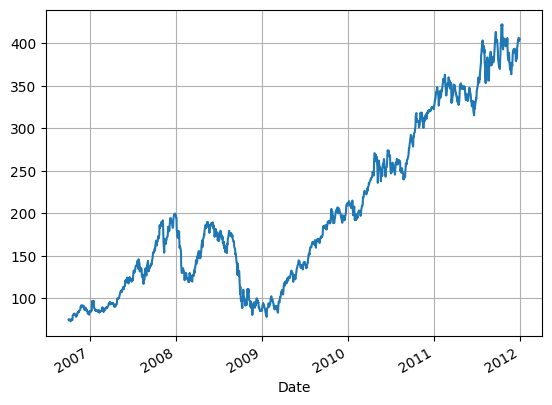

In [36]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

<a id='commonanalyses'></a>
## Common Financial Analysis

### Returns

In [50]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
daily_pct_c.head()


,Adj. Close
Date,
2006-10-02,0.000000
2006-10-03,-0.010553
2006-10-04,0.017686
2006-10-05,-0.007296
2006-10-06,-0.008152


In [51]:
# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
daily_log_returns.head()

,Adj. Close
Date,
2006-10-02,NaN
2006-10-03,-0.010609
2006-10-04,0.017531
2006-10-05,-0.007323
2006-10-06,-0.008185


In [54]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,0.132167,0.134672,0.134987,0.130488,0.735854,NaN,0.0,0.132167,0.134672,0.134987,0.130488,0.735854
2006-12-29,-0.089628,-0.078550,-0.084560,-0.074405,0.236584,NaN,0.0,-0.089628,-0.078550,-0.084560,-0.074405,0.236584
2007-01-31,0.010840,0.007026,0.011876,0.010490,-0.204714,NaN,0.0,0.010840,0.007026,0.011876,0.010490,-0.204714
2007-02-28,-0.021918,-0.004651,-0.016005,-0.013064,0.074066,NaN,0.0,-0.021918,-0.004651,-0.016005,-0.013064,0.074066
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-31,0.007559,-0.007769,-0.005573,-0.014469,-0.173887,NaN,0.0,0.007559,-0.007769,-0.005573,-0.014469,-0.173887
2011-09-30,-0.008833,-0.008136,-0.001781,-0.009121,0.047943,NaN,0.0,-0.008833,-0.008136,-0.001781,-0.009121,0.047943
2011-10-31,0.039523,0.052560,0.052128,0.061523,-0.296069,NaN,0.0,0.039523,0.052560,0.052128,0.061523,-0.296069


In [55]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935


In [62]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
daily_pct_c

,Adj. Close
Date,
2006-10-02,NaN
2006-10-03,-0.010553
2006-10-04,0.017686
2006-10-05,-0.007296
2006-10-06,-0.008152
...,...
2011-12-23,0.011993
2011-12-27,0.007934
2011-12-28,-0.009569


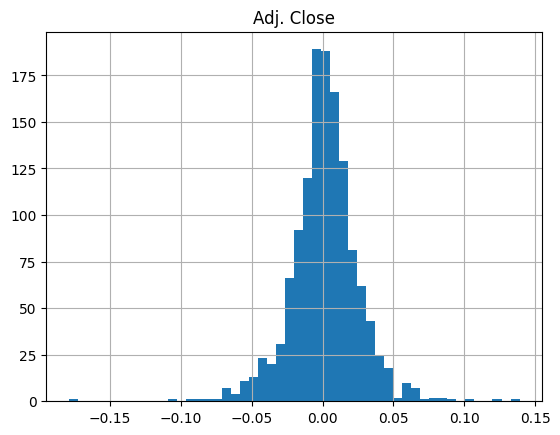

,Adj. Close
count,1322.000000
mean,0.001567
std,0.023994
min,-0.179195
25%,-0.010630
50%,0.001680
75%,0.014306
max,0.139050


In [63]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
daily_pct_c.describe()

In [64]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
cum_daily_return

,Adj. Close
Date,
2006-10-02,NaN
2006-10-03,0.989447
2006-10-04,1.006946
2006-10-05,0.999599
2006-10-06,0.991451
...,...
2011-12-23,5.387791
2011-12-27,5.430537
2011-12-28,5.378573


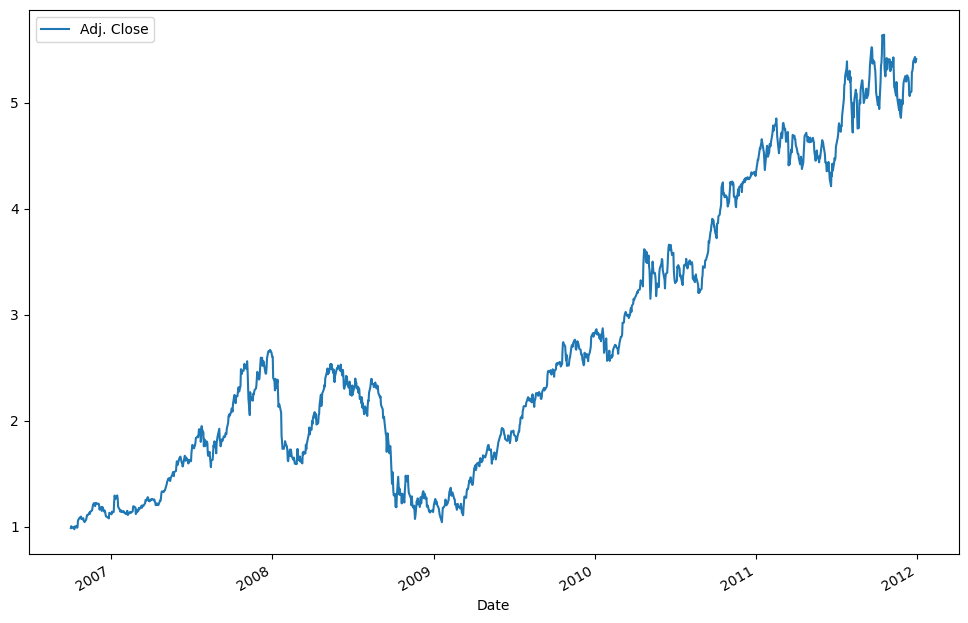

In [59]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [65]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
cum_monthly_return

,Adj. Close
Date,
2006-10-31,1.031704
2006-11-30,1.140058
2006-12-31,1.155110
2007-01-31,1.187303
2007-02-28,1.145275
...,...
2011-08-31,5.032896
2011-09-30,5.243031
2011-10-31,5.306305


In [92]:
# from pandas_datareader import data as pdr
# import fix_yahoo_finance

# def get(tickers, startdate, enddate):
#     def data(ticker):
#         return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
#     datas = map (data, tickers)
#     return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

# all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
# all_data.head()

tickers=['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data=yf.download(tickers ,start=datetime.datetime(2006, 10, 1), end=datetime.datetime(2012, 1, 1))

[*********************100%***********************]  4 of 4 completed


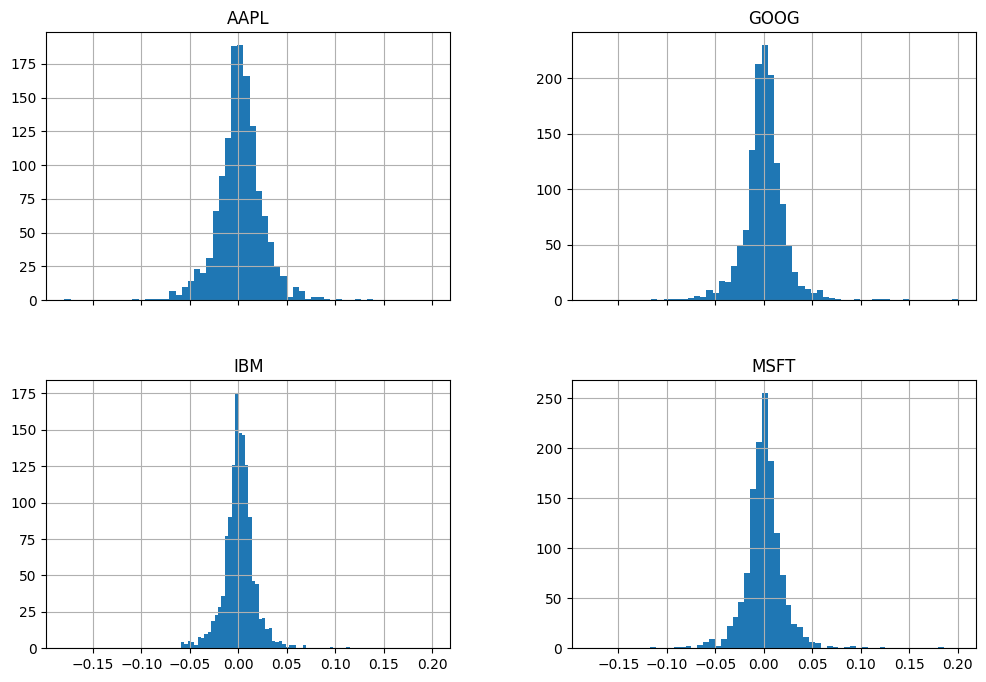

In [93]:
daily_close_px = all_data['Adj Close']

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

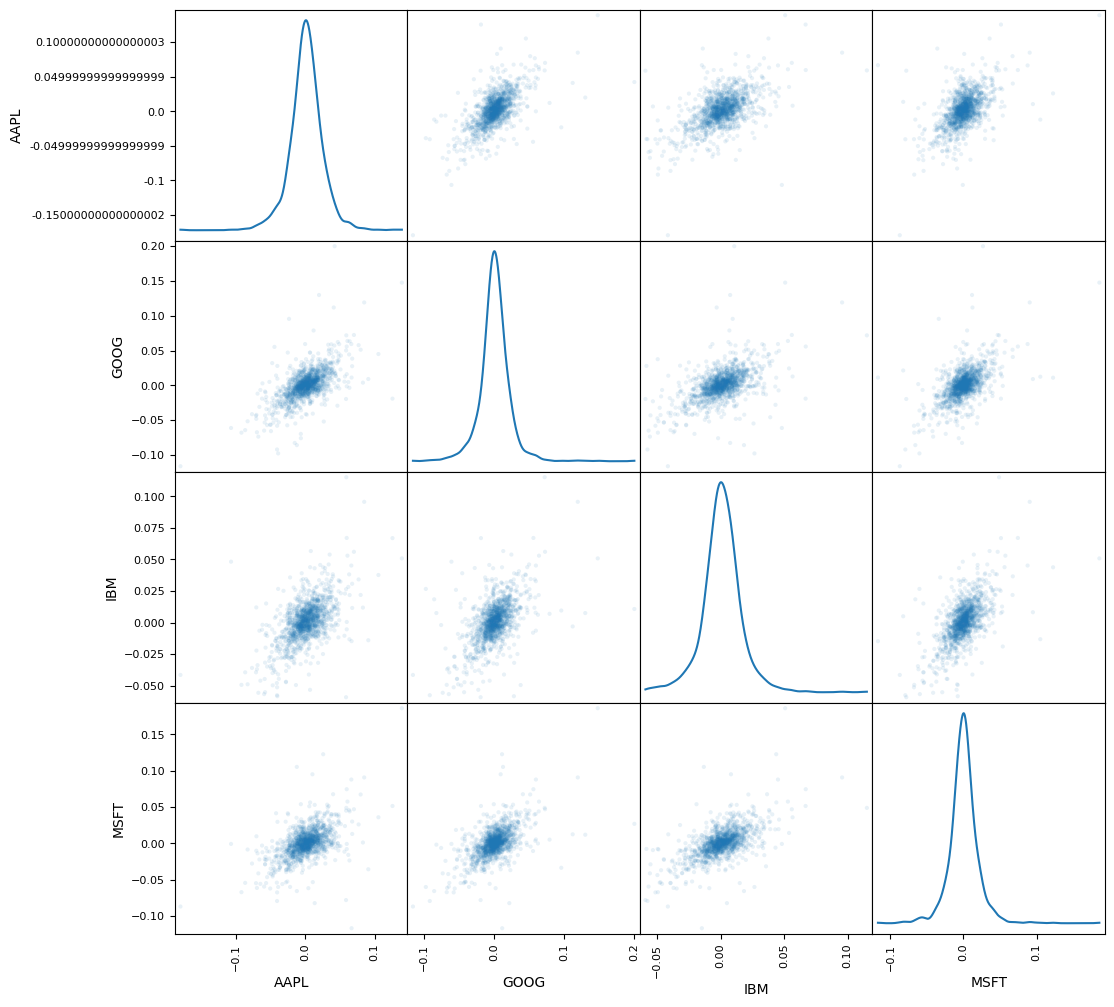

In [94]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

### Moving Windows

In [96]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj. Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2011-12-16    49.954364
2011-12-19    49.920115
2011-12-20    49.888564
2011-12-21    49.884307
2011-12-22    49.877721
2011-12-23    49.873352
2011-12-27    49.878428
2011-12-28    49.871552
2011-12-29    49.899215
2011-12-30    49.923601
Name: Adj. Close, dtype: float64

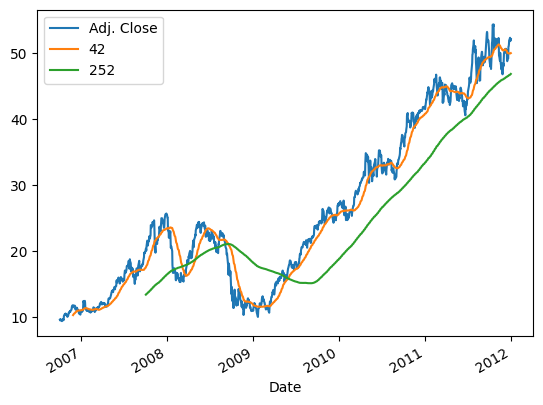

In [98]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj. Close', '42', '252']].plot()

plt.show()

### Volatility Calculation

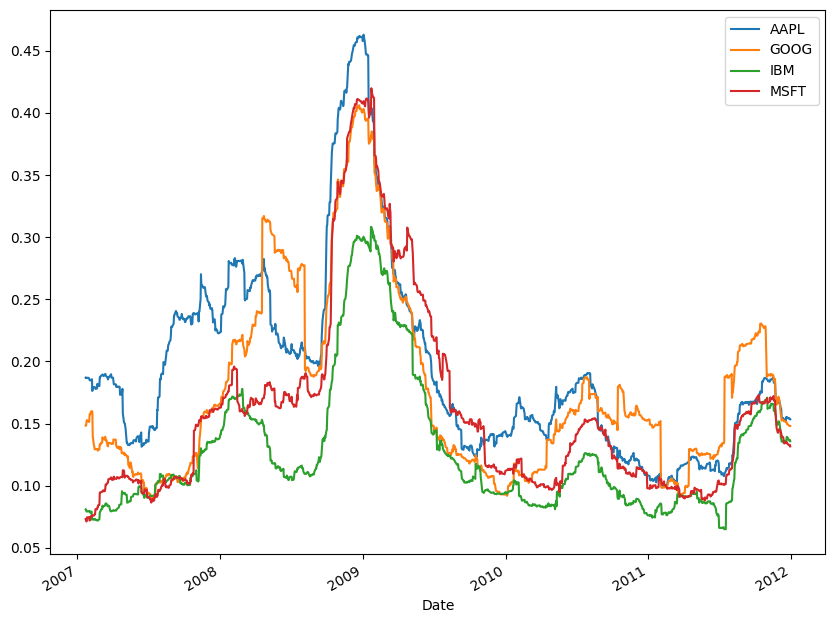

In [99]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

### Ordinary Least-Squares Regression (OLS)

<a id='tradingstrategy'></a>
## Building A Trading Strategy With Python

In [100]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

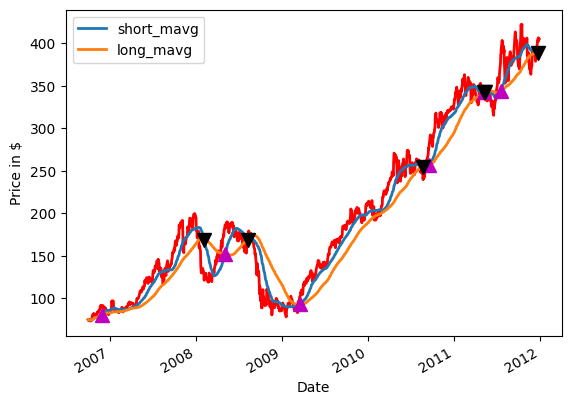

In [101]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting A Strategy

### Implementation Of A Simple Backtester With Pandas

In [104]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj. Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

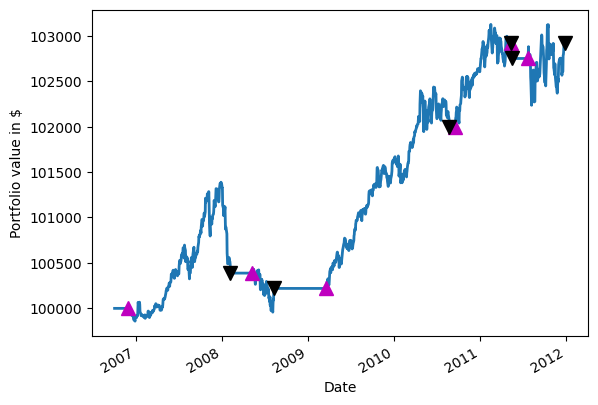

In [105]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating Moving Average Crossover Strategy 

### Sharpe Ratio

In [106]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7261238825870245


### Maximum Drawdown

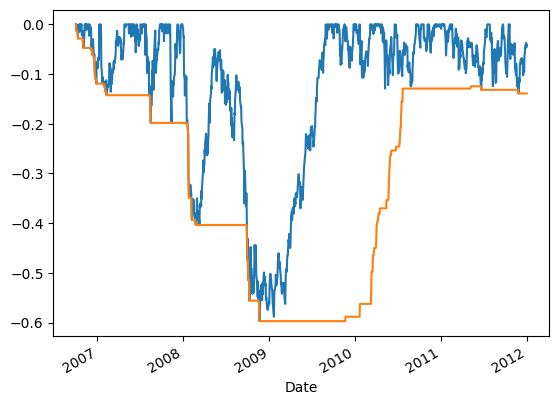

In [108]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj. Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj. Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

In [109]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj. Close'][-1]) / aapl['Adj. Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.38238012707094704
